In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn           as sns

In [2]:
df=pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.9+ KB


In [4]:
df_train=df.sample(frac=.7)
df_test=df.drop(df_train.index)
print('toatal size of df : ', len(df))
print('toatal size of df_train : ', len(df_train))
print('toatal size of df_test : ', len(df_test))

toatal size of df :  32
toatal size of df_train :  22
toatal size of df_test :  10


In [5]:
df_train

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2


In [7]:
df_train_mpg=df_train['mpg']
df_train_wt=df_train['wt']
df_test_mpg=df_test['mpg']
df_test_wt=df_test['wt']


In [8]:
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats as stats

In [9]:
np_train_mpg=np.array(df_train_mpg).reshape(-1,1)
np_train_wt=np.array(df_train_wt).reshape(-1,1)
np_test_mpg=np.array(df_test_mpg).reshape(-1,1)
np_test_wt=np.array(df_test_wt).reshape(-1,1)

In [10]:
clf=LinearRegression(normalize=True)
clf.fit(np_train_wt,np_train_mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [11]:
mpg_pred=clf.predict(np_test_wt)
mpg_pred=mpg_pred.round(2)
mpg_pred

array([[ 20.53],
       [ 18.88],
       [ 17.23],
       [ 16.95],
       [  8.03],
       [ 29.28],
       [ 24.44],
       [ 18.91],
       [ 29.86],
       [ 18.14]])

In [12]:
print('The prediction accuracy = ', r2_score(mpg_pred,np_test_mpg))


The prediction accuracy =  0.762350818659


In [12]:
np_test_mpg


array([[21.4],
       [19.2],
       [17.8],
       [16.4],
       [17.3],
       [15.2],
       [27.3],
       [26. ],
       [30.4],
       [19.7]])

In [14]:
df_predict=pd.DataFrame(dict(wt=(np_test_wt.tolist()),mpg=mpg_pred.tolist()))
df_predict

,mpg,wt
0,[20.53],[3.15]
1,[18.88],[3.44]
2,[17.23],[3.73]
3,[16.95],[3.78]
4,[8.03],[5.345]
5,[29.28],[1.615]
6,[24.44],[2.465]
7,[18.91],[3.435]
8,[29.86],[1.5130000000000001]
9,[18.14],[3.57]


In [14]:
df_predict.to_csv("C://Users/shiva/Desktop/supervised data/predict.csv")

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np_train_wt.flatten(),np_train_mpg.flatten())
print ("The slope and intercept of the regression line are :" , slope,'intercept',intercept)

The slope and intercept of the regression line are : -5.69528414547 intercept 38.4748592487


In [16]:
wt_user=float(input('Enter the mpg value : '))
m = np.asscalar(slope)
c = np.asscalar(intercept)


Enter the mpg value : 25


In [17]:
mpg_result=m*wt_user+c
mpg_result

-103.90724438811912

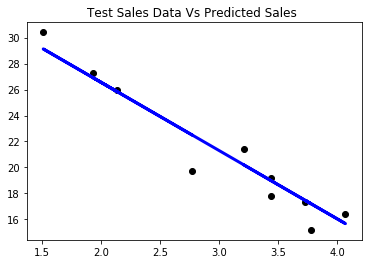

In [21]:
plt.title('Test Sales Data Vs Predicted Sales ')
plt.scatter(np_test_wt, np_test_mpg,  color='black')
plt.plot(np_test_wt,mpg_pred , color='blue', linewidth=3)
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

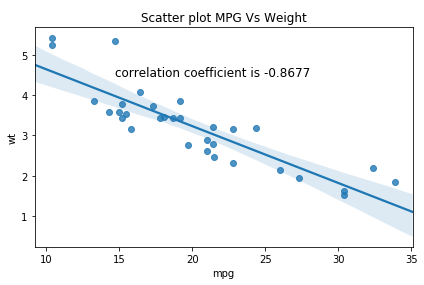

In [25]:
sns.regplot(df['mpg'],df['wt'],ci=95)
corcoeff=np.corrcoef(df['mpg'],df['wt'])[0,1]

text_cc = '\n\n\n\ncorrelation coefficient is %1.4f'%corcoeff
plt.title('Scatter plot MPG Vs Weight')
plt.suptitle(text_cc)
plt.gcf().tight_layout()
# plt.text(15,6.5,text_cc)

plt.show()

In [26]:


model=sm.OLS(df['wt'],df['mpg']).fit()
predictions   = model.predict(df['wt'])
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wt   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     79.58
Date:                Tue, 14 May 2019   Prob (F-statistic):           4.55e-10
Time:                        11:46:02   Log-Likelihood:                -63.824
No. Observations:                  32   AIC:                             129.6
Df Residuals:                      31   BIC:                             131.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mpg            0.1360      0.015      8.921      0.000       0.105       0.167
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.146
Skew:                          -0.092   Prob(JB):                        0.930
Kurtosis:                       2.725   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x=sm.add_constant(df['wt'])

model=sm.OLS(df['wt'],df['mpg']).fit()
predictions   = model.predict(df['wt'])
model.summary()
residuals             = model.resid

In [22]:
sns.set(style="whitegrid")
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model                 = sm.OLS(y, X).fit() ## OLS(output, input)
cars['predictions']   = model.predict(X)
residuals             = model.resid

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


NameError: name 'cars' is not defined

In [27]:
ax = sns.residplot(df_predict, residuals, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly